In [1]:
import requests
import bs4 as bs
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd

api = PushshiftAPI()

BEFORE = int(dt.datetime(2022, 3, 26).timestamp())
AFTER = int(dt.datetime(2019, 1, 1).timestamp())

In [53]:
BEFORE

1648249200

In [2]:
n = 10
distance = int((BEFORE-AFTER)/n)
intervals = [AFTER + i*distance for i in range(n)]
# intervals.append(BEFORE)

B_A_pairs = [(i, i+distance) for i in intervals]
B_A_pairs

[(1546297200, 1556492400),
 (1556492400, 1566687600),
 (1566687600, 1576882800),
 (1576882800, 1587078000),
 (1587078000, 1597273200),
 (1597273200, 1607468400),
 (1607468400, 1617663600),
 (1617663600, 1627858800),
 (1627858800, 1638054000),
 (1638054000, 1648249200)]

In [54]:
a = [1,2]
a.append(3)
a

[1, 2, 3]

In [19]:
posts = list(api.search_submissions(
    subreddit = "eldenring",
    before = BEFORE,
    after = 1648059051,
    filter = [
        "id", 
        "author", 
        "created_utc", 
        "url", # urls starts with https://i.redd.it/ has pictures
        "full_link", # https://reddit.com/<url>
        "title",
        "selftext", # content of post
        "upvote_ratio",
        "num_comments",
        "score" # number of upvotes?
        ],
    # limit = 200,
))

df = pd.DataFrame(posts)
df.to_csv("posts_later.csv", index=None)
# df.to_clipboard()

In [9]:

posts_df = pd.read_csv("posts.csv")
comments_df = pd.read_csv("comments.csv")
posts_df.head()

/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_89172/436495287.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  posts_df = pd.read_csv("posts.csv")


,Unnamed: 0,author,created_utc,full_link,id,num_comments,score,thumbnail,title,upvote_ratio,url,created,d_
0,0,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,tl4xj3,0,1,self,Question on how to make my Weapon Stronger,1.0,https://www.reddit.com/r/Eldenring/comments/tl...,1648055451.0,"{'author': 'Us3l3ssZ3D', 'created_utc': 164805..."
1,1,Key-College-4290,1648059048,https://www.reddit.com/r/Eldenring/comments/tl...,tl4xd9,0,1,self,Anyone else get bored after they get to mounta...,1.0,https://www.reddit.com/r/Eldenring/comments/tl...,1648055448.0,"{'author': 'Key-College-4290', 'created_utc': ..."
2,2,Zoiwillxxx,1648059039,https://www.reddit.com/r/Eldenring/comments/tl...,tl4wvb,0,1,https://a.thumbs.redditmedia.com/4Ptpw2_r2JQDM...,"Welcome champions, to the Radahn Festival!!!",1.0,https://i.redd.it/607ofk61c6p81.jpg,1648055439.0,"{'author': 'Zoiwillxxx', 'created_utc': 164805..."
3,3,LuneMiester,1648059036,https://www.reddit.com/r/Eldenring/comments/tl...,tl4wpl,0,1,self,Can’t find player I invaded now I’m stuck,1.0,https://www.reddit.com/r/Eldenring/comments/tl...,1648055436.0,"{'author': 'LuneMiester', 'created_utc': 16480..."
4,4,Epickartoffelz,1648058994,https://www.reddit.com/r/Eldenring/comments/tl...,tl4vt6,0,1,https://b.thumbs.redditmedia.com/PT5SacNXCW4Hf...,:’),1.0,https://i.redd.it/21h38yc0c6p81.jpg,1648055394.0,"{'author': 'Epickartoffelz', 'created_utc': 16..."


In [23]:
comments_df.head()

,Unnamed: 0,author,created_utc,id,permalink,score,selftext,title,created,d_
0,0,JordanJames__,1648078335,tllean,/r/Eldenring/comments/tllean/to_those_hackers/,1,Thanks for ruining the Elden Ring experience f...,To THOSE hackers… ❌,1648074735.0,"{'author': 'JordanJames__', 'created_utc': 164..."
1,1,oneethan,1648078334,tlle8s,/r/Eldenring/comments/tlle8s/opinion_of_respec...,1,im about halfway through the game ( just befor...,opinion of respecing into arcane,1648074734.0,"{'author': 'oneethan', 'created_utc': 16480783..."
2,2,ElPolloLoco391,1648078321,tlldja,/r/Eldenring/comments/tlldja/was_this_suppose_...,1,NaN,Was this suppose happen ?,1648074721.0,"{'author': 'ElPolloLoco391', 'created_utc': 16..."
3,3,farron__keep,1648078320,tlldhs,/r/Eldenring/comments/tlldhs/melina_and_millic...,1,spoilers for millicent's questline &amp; frenz...,melina and millicent,1648074720.0,"{'author': 'farron__keep', 'created_utc': 1648..."
4,4,SadLittleWizard,1648078319,tlldfk,/r/Eldenring/comments/tlldfk/i_did_a_thing/,1,NaN,I did a thing,1648074719.0,"{'author': 'SadLittleWizard', 'created_utc': 1..."


In [31]:
filter = [
        "id", 
        "author", 
        "created_utc", 
        "url", # urls starts with https://i.redd.it/ has pictures
        "full_link", # https://reddit.com/<url>
        "title",
        "selftext", # content of post
        "upvote_ratio",
        "num_comments",
        "score" # number of upvotes?
        ]
# posts_pre = posts_df.join(comments_df.set_index("id"), how="left", on="id", rsuffix="_c")
posts_pre.columns


Index(['Unnamed: 0', 'author', 'created_utc', 'full_link', 'id',
       'num_comments', 'score', 'thumbnail', 'title', 'upvote_ratio', 'url',
       'created', 'd_', 'Unnamed: 0_c', 'author_c', 'created_utc_c',
       'permalink', 'score_c', 'selftext', 'title_c', 'created_c', 'd__c'],
      dtype='object')

In [37]:
len(posts_df)

360394

In [33]:
posts_pre = posts_pre[filter]

In [38]:
posts = posts_pre.append(df)

/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_89172/4011661051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts = posts_pre.append(df)


In [41]:
posts.to_csv("posts.csv", index=None)

In [10]:
comments_df.head()

,Unnamed: 0,author,created_utc,id,permalink,score,selftext,title,created,d_
0,0,JordanJames__,1648078335,tllean,/r/Eldenring/comments/tllean/to_those_hackers/,1,Thanks for ruining the Elden Ring experience f...,To THOSE hackers… ❌,1648074735.0,"{'author': 'JordanJames__', 'created_utc': 164..."
1,1,oneethan,1648078334,tlle8s,/r/Eldenring/comments/tlle8s/opinion_of_respec...,1,im about halfway through the game ( just befor...,opinion of respecing into arcane,1648074734.0,"{'author': 'oneethan', 'created_utc': 16480783..."
2,2,ElPolloLoco391,1648078321,tlldja,/r/Eldenring/comments/tlldja/was_this_suppose_...,1,NaN,Was this suppose happen ?,1648074721.0,"{'author': 'ElPolloLoco391', 'created_utc': 16..."
3,3,farron__keep,1648078320,tlldhs,/r/Eldenring/comments/tlldhs/melina_and_millic...,1,spoilers for millicent's questline &amp; frenz...,melina and millicent,1648074720.0,"{'author': 'farron__keep', 'created_utc': 1648..."
4,4,SadLittleWizard,1648078319,tlldfk,/r/Eldenring/comments/tlldfk/i_did_a_thing/,1,NaN,I did a thing,1648074719.0,"{'author': 'SadLittleWizard', 'created_utc': 1..."


In [20]:
max(df["created_utc"])

1648249189

In [58]:
B_A_pairs[0][0]

1546297200

In [3]:
for i in B_A_pairs:
    try:
        comments = list(api.search_comments(
        subreddit = "eldenring",
        before = i[1],
        after = i[0],
        filter = [
            "id", 
            "author", 
            "created_utc", 
            "permalink", # https://reddit.com/<url>
            "body",
            "score", # number of upvotes?
            ],
        # limit =1,
        ))
        df = pd.DataFrame(comments)
        df.to_csv(f"comments_after_{i[0]}.csv")

        print(f"{i} is finished!")
    except:
        print(i)
        pass
        

/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


(1546297200, 1556492400) is finished!
(1556492400, 1566687600) is finished!


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


(1566687600, 1576882800) is finished!


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


(1576882800, 1587078000) is finished!


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 525
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


(1587078000, 1597273200) is finished!


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 502
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 525
  warnings.warn("Got non 200 

(1597273200, 1607468400) is finished!


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 522
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


(1607468400, 1617663600)


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 502
  warnings.warn("Got non 200 code %s" % response.status_code)


(1617663600, 1627858800)
(1627858800, 1638054000)


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 524
  warnings.warn("Got non 200 code %s" % response.status_code)


(1638054000, 1648249200)


In [47]:
import datetime as dt
# import ValueError
# from psaw.PushshiftAPI

for i in B_A_pairs:
    try:

def safeIntegerInput(num_retries = 5):
    for attempt_no in range(num_retries):
        try:
            comments = list(api.search_comments(
            subreddit = "eldenring",
            before = BEFORE,
            after = AFTER,
            filter = [
                "id", 
                "author", 
                "created_utc", 
                "permalink", # https://reddit.com/<url>
                "body",
                "score", # number of upvotes?
                ],
            # limit =1,
        ))
            df = pd.DataFrame(comments)
            df.to_csv("comments.csv")

        except ValueError as error:
            if attempt_no<(num_retries-1):
                print("ValueError, connection broke")
            else:
                raise error

safeIntegerInput()


/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 524
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 522
  warnings.warn("Got non 200 

ChunkedEncodingError: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))

In [80]:
pd.DataFrame(comments).to_clipboard()

In [76]:
df = pd.read_csv("comments.csv")
df.head().to_clipboard()

In [65]:
def utc_to_date_string(utc):
    date = dt.datetime.fromtimestamp(utc).date()
    return date.strftime("%d-%m-%Y")

df["create_date"] = df["created_utc"].apply(utc_to_date_string)
df.head()

,Unnamed: 0,author,created_utc,full_link,id,num_comments,score,thumbnail,title,upvote_ratio,url,created,d_,create_date
0,0,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,tl4xj3,0,1,self,Question on how to make my Weapon Stronger,1.0,https://www.reddit.com/r/Eldenring/comments/tl...,1648055451.0,"{'author': 'Us3l3ssZ3D', 'created_utc': 164805...",23-03-2022
1,1,Key-College-4290,1648059048,https://www.reddit.com/r/Eldenring/comments/tl...,tl4xd9,0,1,self,Anyone else get bored after they get to mounta...,1.0,https://www.reddit.com/r/Eldenring/comments/tl...,1648055448.0,"{'author': 'Key-College-4290', 'created_utc': ...",23-03-2022
2,2,Zoiwillxxx,1648059039,https://www.reddit.com/r/Eldenring/comments/tl...,tl4wvb,0,1,https://a.thumbs.redditmedia.com/4Ptpw2_r2JQDM...,"Welcome champions, to the Radahn Festival!!!",1.0,https://i.redd.it/607ofk61c6p81.jpg,1648055439.0,"{'author': 'Zoiwillxxx', 'created_utc': 164805...",23-03-2022
3,3,LuneMiester,1648059036,https://www.reddit.com/r/Eldenring/comments/tl...,tl4wpl,0,1,self,Can’t find player I invaded now I’m stuck,1.0,https://www.reddit.com/r/Eldenring/comments/tl...,1648055436.0,"{'author': 'LuneMiester', 'created_utc': 16480...",23-03-2022
4,4,Epickartoffelz,1648058994,https://www.reddit.com/r/Eldenring/comments/tl...,tl4vt6,0,1,https://b.thumbs.redditmedia.com/PT5SacNXCW4Hf...,:’),1.0,https://i.redd.it/21h38yc0c6p81.jpg,1648055394.0,"{'author': 'Epickartoffelz', 'created_utc': 16...",23-03-2022


<AxesSubplot:xlabel='create_date'>

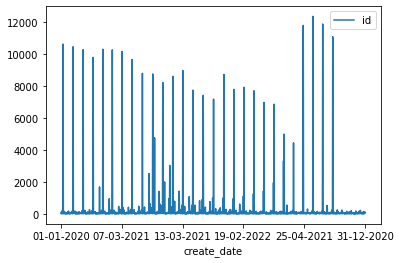

In [74]:
from matplotlib import pyplot as plt

df.groupby("create_date").count().plot(y="id")
plt.xlim()

In [63]:
a = 1648059051
dt.datetime.fromtimestamp(a).date().strftime("%d-%m-%Y")


'23-03-2022'

In [24]:
df.groupby([])

/Users/jersey/Library/Caches/pypoetry/virtualenvs/analysis-of-r-eldenring-n2W_eMD4-py3.8/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


comment(all_awardings=[], archived=False, associated_award=None, author='Rascally_Dog', author_flair_background_color=None, author_flair_css_class=None, author_flair_richtext=[], author_flair_template_id=None, author_flair_text=None, author_flair_text_color=None, author_flair_type='text', author_fullname='t2_5b60acr0', author_patreon_flair=False, author_premium=False, body='Me too &gt;.&gt;;', body_sha1='1054a3f80437a71df4a39d0aff0c65bf976b3aa8', can_gild=True, collapsed=False, collapsed_because_crowd_control=None, collapsed_reason=None, collapsed_reason_code=None, comment_type=None, controversiality=0, created_utc=1648052063, distinguished=None, gilded=0, gildings={}, id='i1t7zy0', is_submitter=False, link_id='t3_t7cfvr', locked=False, no_follow=True, parent_id='t1_i1qfbbk', permalink='/r/Eldenring/comments/t7cfvr/anyone_know_where_to_find_the_item_deathbed_smalls/i1t7zy0/', retrieved_utc=1648052074, score=1, score_hidden=False, send_replies=True, stickied=False, subreddit='Eldenring'

In [28]:
import pandas as pd

pd.DataFrame(posts).to_clipboard()

In [11]:
posts[0]

submission(all_awardings=[], allow_live_comments=False, author='MinerGFX', author_flair_css_class=None, author_flair_richtext=[], author_flair_text=None, author_flair_type='text', author_fullname='t2_8w4fp6tp', author_is_blocked=False, author_patreon_flair=False, author_premium=False, awarders=[], can_mod_post=False, contest_mode=False, created_utc=1648051143, domain='self.Eldenring', full_link='https://www.reddit.com/r/Eldenring/comments/tkxjuw/best_robustness_armor_in_the_game/', gildings={}, id='tkxjuw', is_created_from_ads_ui=False, is_crosspostable=True, is_meta=False, is_original_content=False, is_reddit_media_domain=False, is_robot_indexable=True, is_self=True, is_video=False, link_flair_background_color='#ff66ac', link_flair_richtext=[{'e': 'text', 't': 'Game Help'}], link_flair_template_id='56473fd2-9649-11ec-bef4-1edf0f12e8db', link_flair_text='Game Help', link_flair_text_color='dark', link_flair_type='richtext', locked=False, media_only=False, no_follow=True, num_comments=0,